In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def reward(state, action):
    if state == 0 and state == 1:
        return 1
    elif state == 2:
        return -2
    elif state == 3 and action == 1:
        return -3
    elif state == 3:
        return 3
    else:
        return 0
    
    
def transition(state, action, next_state):
    if state == 0 and action == 0 and next_state==1:
        return 1
    elif state == 1 and action == 1 and next_state ==2:
        return 0.6
    elif state == next_state:
        return 0.5
    elif state == 2 and action == 0 and next_state == 3:
        return 0.7
    elif state == 1 and action == 0 and next_state == 1:
        return 0.2
    else:
        return 0

Initial Value Function: [[0.33248022 0.0806593 ]
 [0.44663829 0.0722518 ]
 [0.20479784 0.51253852]
 [0.3391125  0.01375343]]


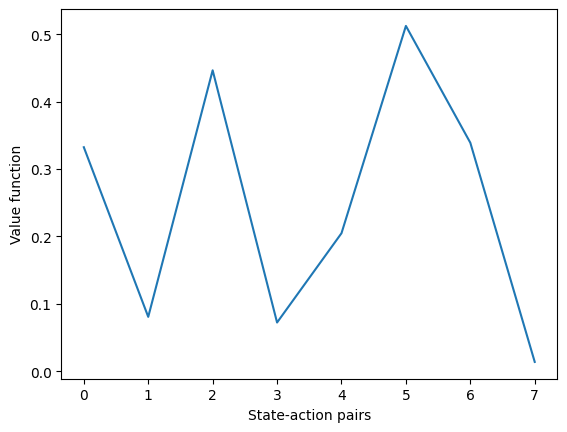

Optimal Value Function  [[ 6.92456241e-03  6.20154191e-03]
 [ 3.61510251e-04 -6.78837997e-01]
 [-1.24895623e+00 -1.56599959e+00]
 [ 2.72645954e+00 -2.73540456e-01]]


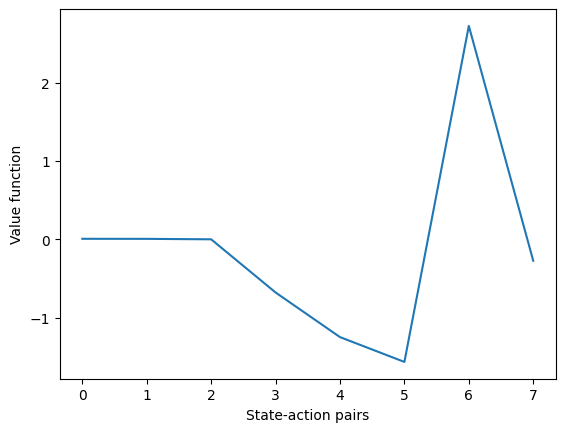

In [3]:
def bellman(value, gamma):
    new_value = np.zeros_like(value)
    for state in range(value.shape[0]):
        max_value = -np.inf
        for action in range(value.shape[1]):
            action_value = 0
            for next_state in range(value.shape[0]):
                action_value += transition(state, action, next_state) * (reward(state, action) + gamma * value[next_state, :].max())
                max_value = max(max_value, action_value)
                new_value[state, action] = action_value
    return new_value

#value function v(s,a)
value = np.random.rand(4, 2)
print('Initial Value Function:', value)
plt.plot(value.flatten())
plt.xlabel('State-action pairs')
plt.ylabel("Value function")
plt.show()
gamma = 0.9
    
#Compute optimal val function
for i in range(10):
    value = bellman(value, gamma)
    
#print optimal val fn
print('Optimal Value Function ', value)
plt.plot(value.flatten())
plt.xlabel('State-action pairs')
plt.ylabel("Value function")
plt.show()